# BE ML Practical No.02

## B213020: NEHAL RANE

'''Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv
'''


In [1]:
#!pip uninstall sklearn  # if it's installed
#!pip install scikit-learn
#!pip install pyarrow


In [2]:
# basicimports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [3]:
# Load Dataset

df = pd.read_csv('emails.csv')

df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
#Description
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [5]:
#Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
#Check Datatypes
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

<Axes: >

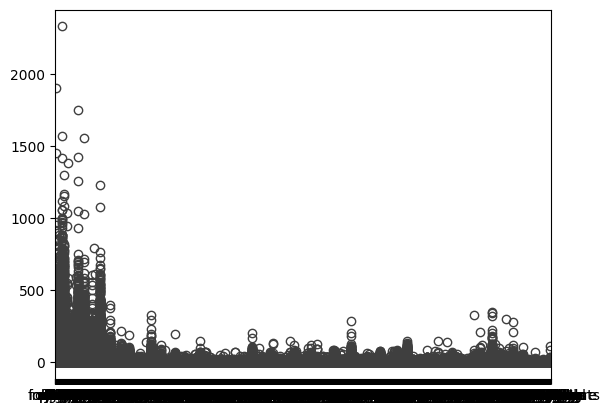

In [7]:
#ploting sns.boxplot 
sns.boxplot(df)

array([[<Axes: title={'center': 'Prediction'}>]], dtype=object)

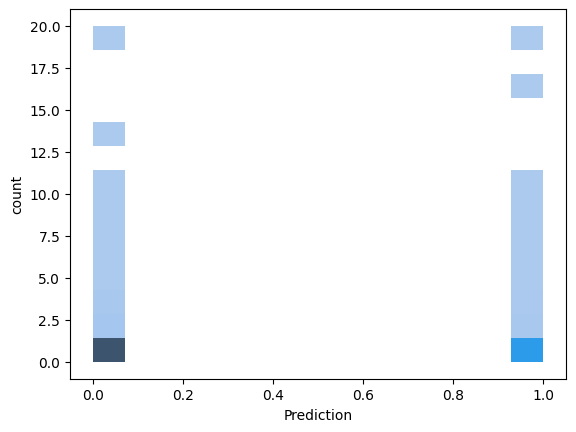

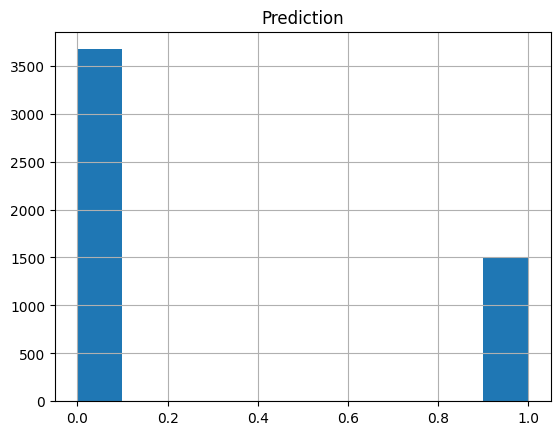

In [8]:
#Check balance of data for classification type of problem with identifing unique values
#Histogram
sns.histplot(data=df, x='Prediction', y='count')
df.hist('Prediction')

### Scaling is not needed as distribution is already ready.

## Data Cleaning and Refinement

In [9]:
# Drop 'Email No.' as it's just an identifier and doesn't provide predictive value
df = df.drop(columns=['Email No.'])

# Separate features and target
X = df.drop(columns=['Prediction']) # X = df.iloc[,-1] 
y = df['Prediction']


## train_test_split to get dataset ready

In [10]:
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# K-Nearnest Neighbors Model Creation (KNN: from sklearn.neighbors import KNeighborsClassifier)

In [11]:
# import knn from sklearn and metrices for evaluation support
from sklearn.neighbors import KNeighborsClassifier


# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


## Evaluation of K-Nearnest Neighbors

In [12]:
# Evaluate KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

acc = accuracy_score(y_test, y_pred)
creport = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("KNN Performance:")
print("Accuracy:", acc)
print("Accuracy Percentage:", acc*100)
print("Classification Report:\n", creport)
print("Confusion Matrix:\n", cm)

KNN Performance:
Accuracy: 0.8640463917525774
Accuracy Percentage: 86.40463917525774
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90      1097
           1       0.74      0.82      0.78       455

    accuracy                           0.86      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.86      0.87      1552

Confusion Matrix:
 [[966 131]
 [ 80 375]]


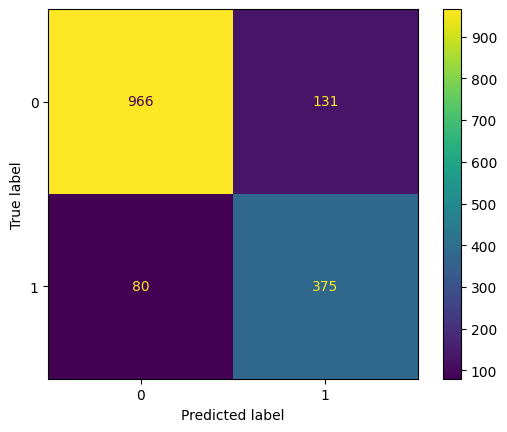

In [13]:
#Visualization of Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Support Vector Machine (SVM: from sklearn.svm inport SVC )

In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv('emails.csv')

# Drop 'Email No.' as it's just an identifier and doesn't provide predictive value
df = df.drop(columns=['Email No.'])

# Separate features and target
X = df.drop(columns=['Prediction'])
y = df['Prediction']

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
#Creating SVM model
from sklearn.svm import SVC


# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

SVM Performance:
Accuracy: 0.9568298969072165
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1097
           1       0.92      0.93      0.93       455

    accuracy                           0.96      1552
   macro avg       0.95      0.95      0.95      1552
weighted avg       0.96      0.96      0.96      1552

Confusion Matrix:
 [[1062   35]
 [  32  423]]


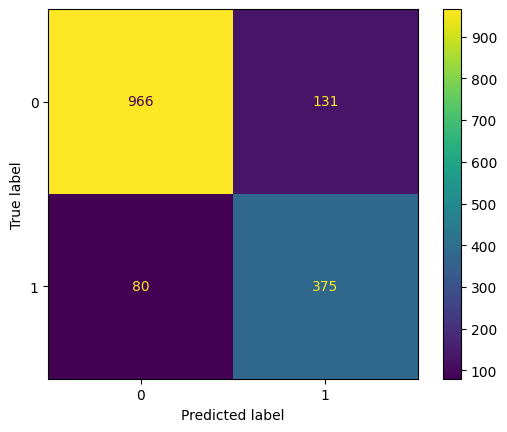

In [17]:
#Imports for Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

acc = accuracy_score(y_test, svm_predictions)
creport = classification_report(y_test, svm_predictions)
cm = confusion_matrix(y_test, svm_predictions)

# Evaluate SVM
print("SVM Performance:")
print("Accuracy:", acc)
print("Classification Report:\n", creport)
print("Confusion Matrix:\n", cm)

print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))